#### SVC on wheat dataset
* compared with K-neighbors
* 2-dimensional presentation for result visualization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/Codes/Course_edX_PythonDataScience/Cached_Datasets/'
fname = flc + 'wheat.data'
X = pd.read_csv(fname, index_col = 0)

In [3]:
# remove rows with NaN
X = X.dropna(axis = 0)

In [4]:
# separate into labels and data & convert labels into numbers
y = X.wheat_type
labels = y.unique()
Y = y.map({labels[i]: i for i in range(len(labels))}) # for plotting purpose
X = X.drop(labels = 'wheat_type', axis = 1)

In [5]:
# split the datasets into training & testing data
# random_state = 7 to ensure repeatable results; skiped in real cases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [6]:
Niter = 5000 #200000 #

In [7]:
# classifier: SVC
svc = SVC(C = 1.0, kernel = 'linear', cache_size = 200)
# run multiple times to test speed
t0 = time.time()
for i in range(Niter):
    svc.fit(X_train, Y_train)
print(Niter, ' Training time (s): ', time.time() - t0)
t0 = time.time()
for i in range(Niter):
    svc.predict(X_test)
print(Niter, ' Testing time (s): ', time.time() - t0)

5000  Training time (s):  3.215996026992798
5000  Testing time (s):  0.6891951560974121


In [8]:
print('score: ', svc.score(X_test, Y_test))

score:  0.868852459016


In [9]:
# classifer: KNeighbors
knc = KNeighborsClassifier(n_neighbors = 5)
# run multiple times to test speed
t0 = time.time()
for i in range(Niter):
    knc.fit(X_train, Y_train)
print(Niter, ' Training time (s): ', time.time() - t0)
t0 = time.time()
for i in range(Niter):
    knc.predict(X_test)
print(Niter, ' Testing time (s): ', time.time() - t0)

5000  Training time (s):  1.4918920993804932
5000  Testing time (s):  2.732516288757324


In [10]:
print('score: ', knc.score(X_test, Y_test))

score:  0.83606557377


In [11]:
def plot2D(X_train, Y_train, X_test, Y_test, model):
    # multi-dimension -- contour for every two features
    colors0 = ['#ff0000', '#00ff00', '#0000ff'] #RGB
    colors = [colors0[i] for i in Y_train] # color-code the labels
    colormaps = matplotlib.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])

    Ncol = len(X_train.columns)

    plt.figure(figsize = (14,14))
    cnt = 0
    score0 = []
    for col in range(Ncol):
        for row in range(Ncol):
            plt.subplot(Ncol,Ncol,cnt+1)
            plt.xticks(())
            plt.yticks(())

            X_train_bag = X_train.iloc[:, [row, col]]
            X_test_bag = X_test.iloc[:, [row, col]]

            if col == row:
                plt.text(.5, .5, X_train.columns[row],
                         verticalalignment = 'center', horizontalalignment = 'center')
                cnt += 1
                continue
            # remove repeated plots
            if col > row: cnt += 1; continue

            # the range of the contour
            xmin, xmax = X_train_bag.iloc[:,0].min(), X_train_bag.iloc[:,0].max()
            ymin, ymax = X_train_bag.iloc[:,1].min(), X_train_bag.iloc[:,1].max()
            padding = 3
            xmin -= padding
            ymin -= padding
            xmax += padding
            ymax += padding

            # the grids of the contour
            resolution = 0.5
            xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                                 np.arange(ymin, ymax, resolution))
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            model.fit(X_train_bag, Y_train)
            zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
            zz = zz.reshape(xx.shape)

            # contour plot
            plt.contourf(xx, yy, zz, cmap = colormaps)

            # scatter plot
            plt.scatter(X_train_bag.iloc[:,0], X_train_bag.iloc[:,1], c = colors)

            # record the scores
            score0.append(model.score(X_test_bag, Y_test))

            cnt += 1
    plt.show()
    print('Max 2D score: ', max(score0))
    print('Min 2D score: ', min(score0))

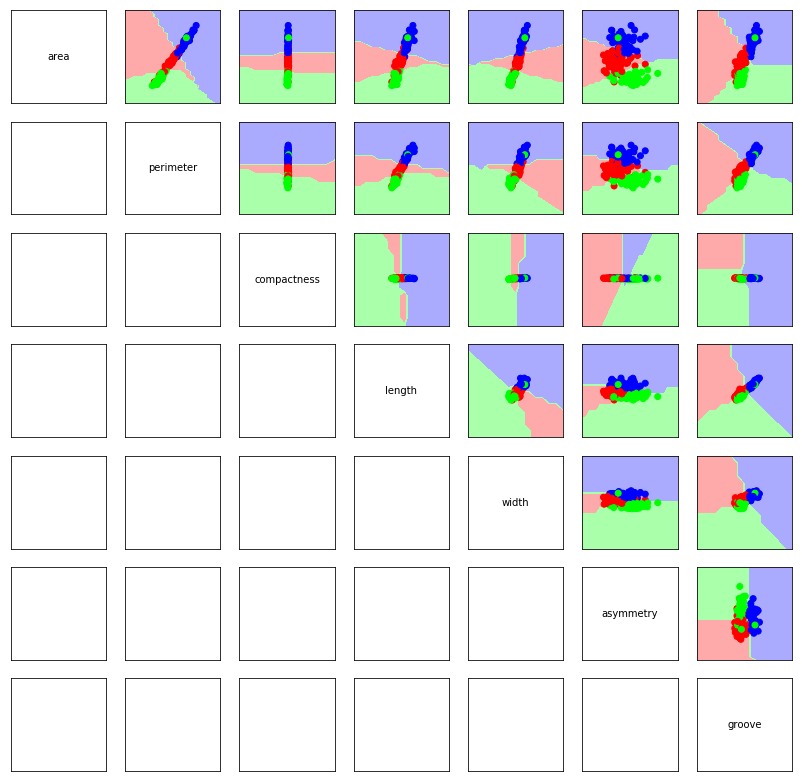

Max 2D score:  0.934426229508
Min 2D score:  0.459016393443


In [12]:
#low dimensional presentation of SVC
svc = SVC(C = 1.0, kernel = 'linear', cache_size = 200)
plot2D(X_train, Y_train, X_test, Y_test, svc)

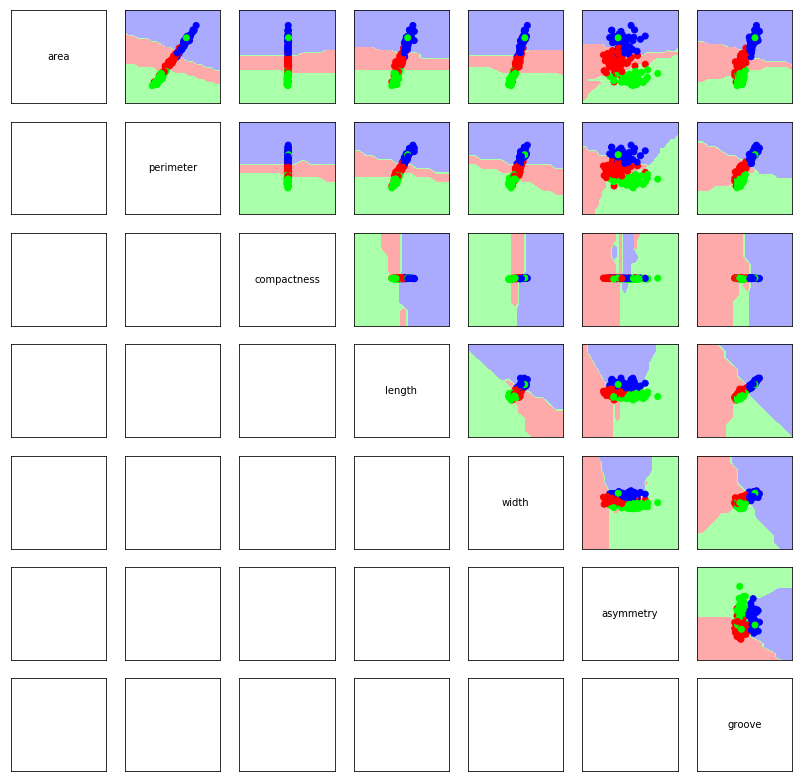

Max 2D score:  0.901639344262
Min 2D score:  0.475409836066


In [13]:
#low dimensional presentation of KNeighbors
knc = KNeighborsClassifier(n_neighbors = 5)
plot2D(X_train, Y_train, X_test, Y_test, knc)